# Librerias

In [1]:
from scipy.stats import bernoulli, binom 
import numpy as np
import sympy # para calculo simbolico y algebraico -> encontra el estimador de maneta analítica
from sympy.abc import x
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy.stats import f, chi2
import scipy.stats as st
import scipy.stats as stats

# Estadística Ineferencial

## 1.1 Estimadores y sus propiedades

Un estimador es una función matemática que se aplica a los datos muestrales para aproximar un parámetro desconocido de la población, como la media $\mu$, la varianza $\sigma^{2}$, etc.
* El valor del estimador sobre una muestra específica se llama estimación

##### Propiedades deseables de los estimadores:

1.	Insesgadez (o No sesgo)
Un estimador $\hat{\theta}$ es insesgado si su valor esperado es igual al parámetro que estima:
$$ E[\hat{\theta}]=θ $$
Si no cumple esta propiedad, se dice que está sesgado.
2.	Eficiencia
Entre dos estimadores insesgados, el más eficiente es el que tiene menor varianza.
* 	Un estimador eficiente proporciona estimaciones más cercanas al verdadero valor del parámetro con menos variabilidad.
3.	Consistencia
Un estimador es consistente si, al aumentar el tamaño de la muestra, converge en probabilidad al verdadero valor del parámetro:
$$\hat{\theta}_n \xrightarrow{p} \theta $$
Es decir, cuanto más grande la muestra, más cerca estará la estimación del valor real.
4.	Suficiencia
Un estimador es suficiente si resume toda la información relevante de la muestra respecto al parámetro.
* Formalmente: T(X) es suficiente para $\theta$ si la distribución condicional de los datos dado T(X) no depende de $\theta$


### 1.1.1 Estimador Máximo Verosímil

Existen distintos métodos para estimar parámetros desconocidos a partir de un conjunto de datos. El Estimador Máximo Verosímil (MLE) responde a la siguiente pregunta:

¿Para qué valor del parámetro, los datos observados tienen la probabilidad más alta?


### Ejemplo 

Una moneda se lanza 100 veces. Dado que se obtienen 55 soles, econtrar el MLE para la probabilidad $p$ de obtener sol en un sólo lanzamiento,

Podemos pensar en contar el número de soles en los 100 lanzamientos, entonces la probabilidad de obtener 55 soles en este experimento, es la siguiente:

Si $X:$ el numero de soles que se obtienen al lanzar una moneda, se tiene que $X\sim Bin(100,p)$, es decir, 

$$ P(55 soles; p) = \binom{100}{55}p^{55}(1-p)^{100-55} $$


**Función de verosímilitud.** Sea $X_1,X_2,\dots,X_n$ una muestra aleatoria con $f(x;\theta)$. La función de verosimilitud (likelihood) es:
$$ f(x_1,\dots,x_n;\theta) = f(x_1;\theta)\cdots f(x_n;\theta) $$
Entpnces, 
$$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$

Ejemplo. Si $X_1,\dots,X_n$ es una m.a. Poisson($\lambda$), entonces
$$ L(x_1,\dots,x_n;\lambda) = \frac{e^{-n\lambda} \lambda^{\sum x_i }}{\prod x_i !}$$ 

**Estimador Máximo Verosímil** es el valor de $\theta$, donde $L(x_1,\dots,x_n;\theta)$ alcanza el máximo.

Pasos: 

- $$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$
- $$\ln L(x_1,\dots,x_n;\theta) $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} = 0 $$
  y despejar $\theta$ para encontrar el máximo.

Para nuestro caso, tenemos
$$ \frac{P(55 soles ;p)}{dp}=\binom{100}{55}p^{55}(1-p)^{45} - 45p^{55}(1-p)^44=0$$
entonces, resolviendo para $p$, se tiene
$$ \binom{100}{55}p^{55}(1-p)^{45}=45^{55}(1-p)^44 $$
entonces,
$$ 55(1-p) = 45p $$
entonces, 
$$p = \frac{55}{100}$$

Por lo tanto, el MLE para $p$, es $\hat{p}=0.55$

In [2]:
# Definir a p como una variable simbolica positiva

p = sympy.symbols('p', positive = True )
f = p**55 * (1-p)**(100-55)
phat = sympy.solve(sympy.diff(f,p),p)[0]

print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 11/20


###### Otro ejemplo

In [3]:
r = binom.rvs(1,0.7, size=100)
r

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [4]:
f = p**x*(1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r])
logJ = sympy.expand_log(sympy.log(J)) #logaritmo
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 71/100


### Ejercicios

El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el método de momentos para la media de la distribución.
- Encuentra el valor del estimador con los datos dados.

In [5]:
def printmd(string):
    display(Markdown(string))

In [6]:
theta = sympy.Symbol('theta', positive=True, real=True)
x = sympy.Symbol('x', positive=True, real=True)

f_tiempo = (1/theta) * sympy.exp(-x/theta)

datos = [
    525, 719, 2880, 150, 30, 251, 45, 858, 15, 47,
    90, 56, 68, 6, 189, 180, 60, 60, 294, 747
]

L = sympy.prod([f_tiempo.subs(x, i) for i in datos])

logL = sympy.expand_log(sympy.log(L))

dlogL = sympy.diff(logL, theta)

theta_mle = sympy.solve(dlogL, theta)[0]

printmd(r"""
##### Estimador de máxima verosimilitud
El estimador de máxima verosimilitud para $\theta$ es:
$$\hat{\theta}_{MLE} = \frac{727}{2} = %.1f$$
""" % theta_mle.evalf())


##### Estimador de máxima verosimilitud
El estimador de máxima verosimilitud para $\theta$ es:
$$\hat{\theta}_{MLE} = \frac{727}{2} = 363.5$$


##### Ejercicio 2.

Sea una muestra aleatoria $X_1, \ldots, X_n \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2) $.
Queremos encontrar el estimador de máxima verosimilitud para $\mu$ y $\sigma^2$.

La función de densidad es:
$$ f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \cdot \mathbf{1}_{(-\infty, \infty)}(x)$$

In [7]:
mu, sigma2 = sympy.symbols('mu sigma2', positive=True, real=True)
x = sympy.Symbol('x', real=True)

f_normal = (1/sympy.sqrt(2 * sympy.pi * sigma2)) * sympy.exp(-((x - mu)**2) / (2 * sigma2))

datos_normal = sympy.symbols('x1:6')  # x1, x2, x3, x4, x5 como ejemplo

logL_normal = sympy.Add(*[sympy.expand_log(sympy.log(f_normal.subs(x, xi))) for xi in datos_normal])

dlogL_mu = sympy.diff(logL_normal, mu)
dlogL_sigma2 = sympy.diff(logL_normal, sigma2)

sol_normal = sympy.solve([dlogL_mu, dlogL_sigma2], (mu, sigma2), dict=True)[0]

printmd(r"""
##### Estimadores de máxima verosimilitud
Para una muestra $X_1, \dots, X_n \sim \mathcal{N}(\mu, \sigma^2)$, los estimadores son:
$$ \hat{\mu}_{MLE} = \frac{1}{n} \sum x_i \quad \text{y} \quad \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum (x_i - \hat{\mu})^2 $$
""")


##### Estimadores de máxima verosimilitud
Para una muestra $X_1, \dots, X_n \sim \mathcal{N}(\mu, \sigma^2)$, los estimadores son:
$$ \hat{\mu}_{MLE} = \frac{1}{n} \sum x_i \quad \text{y} \quad \hat{\sigma}^2_{MLE} = \frac{1}{n} \sum (x_i - \hat{\mu})^2 $$


###### Ejercicio 3.

Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro $\theta$ (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de $2,3,1,3$ y $5$ años, respectivamente. ¿Cuál es el MLE para $\theta$?

In [8]:
theta = sympy.Symbol('theta', positive=True, real=True)
x = sympy.Symbol('x', positive=True, real=True)

f_focos = (1/theta) * sympy.exp(-x/theta)

datos_focos = [2, 3, 1, 3, 5]

L_focos = sympy.prod([f_focos.subs(x, i) for i in datos_focos])

logL_focos = sympy.expand_log(sympy.log(L_focos))

dlogL_focos = sympy.diff(logL_focos, theta)
theta_mle_focos = sympy.solve(dlogL_focos, theta)[0]

printmd(r"""
##### Estimador de máxima verosimilitud
Dada una muestra de vidas útiles $[2, 3, 1, 3, 5]$, el estimador MLE es:
$$ \hat{\theta}_{MLE} = %.2f $$
""" % theta_mle_focos.evalf())


##### Estimador de máxima verosimilitud
Dada una muestra de vidas útiles $[2, 3, 1, 3, 5]$, el estimador MLE es:
$$ \hat{\theta}_{MLE} = 2.80 $$


##### Ejercicio 4.

Sea $ (X_1, \ldots, X_n) $ una m.a:

$$
f(x; \theta) = \theta (1 + x)^{-(1 + \theta)} \cdot \mathbf{1}_{(0, \infty)}(x), \quad \theta > 0
$$

Estimar $\theta$ por momentos, asumiendo que $\theta > 1$.

In [9]:
x, theta = sympy.symbols('x theta', real=True)
theta = sympy.Symbol('theta', positive=True, real=True)

f_densidad = theta * (1 + x)**(-(1 + theta))

E_X = sympy.integrate(x * f_densidad, (x, 0, sympy.oo), conds='none')

x_bar = sympy.Symbol(r'\bar{x}', positive=True, real=True)
eq_momentos = sympy.Eq(E_X, x_bar)
eq_momentos = sympy.Eq(sympy.simplify(eq_momentos.lhs), eq_momentos.rhs)

theta_mm = sympy.solve(eq_momentos, theta)

printmd(r"""
##### Estimador por el método de momentos
Para la distribución con densidad $f(x;\theta) = \theta(1+x)^{-(1+\theta)}$, el estimador por momentos es:
$$ \hat{\theta}_{MLE} = %s $$
""" % sympy.latex(theta_mm[0]))


##### Estimador por el método de momentos
Para la distribución con densidad $f(x;\theta) = \theta(1+x)^{-(1+\theta)}$, el estimador por momentos es:
$$ \hat{\theta}_{MLE} = \frac{\bar{x} + 1}{\bar{x}} $$


## 2.1 Distribuciones muestrales

### 2.1.1 Distribución *t* de Student



Sean:

- $X \sim \mathcal{N}(0,1)$  
- $Y \sim \chi^2(n - 1)$  

Entonces:

$$
T = \frac{X \cdot \sqrt{n}}{\sqrt{\dfrac{Y}{n - 1}}} \sim t(n - 1)
$$

Gráficamente, la distribución *t* tiene forma de campana, similar a la normal estándar, pero con colas más gruesas. A medida que $n \to \infty$, se aproxima a una normal estándar:

$$
\lim_{n \to \infty} t(n) = \mathcal{N}(0,1)
$$

---

> 📌 Esta distribución es útil cuando se desconoce la varianza poblacional y se utiliza una estimación muestral.


### Ejemplos

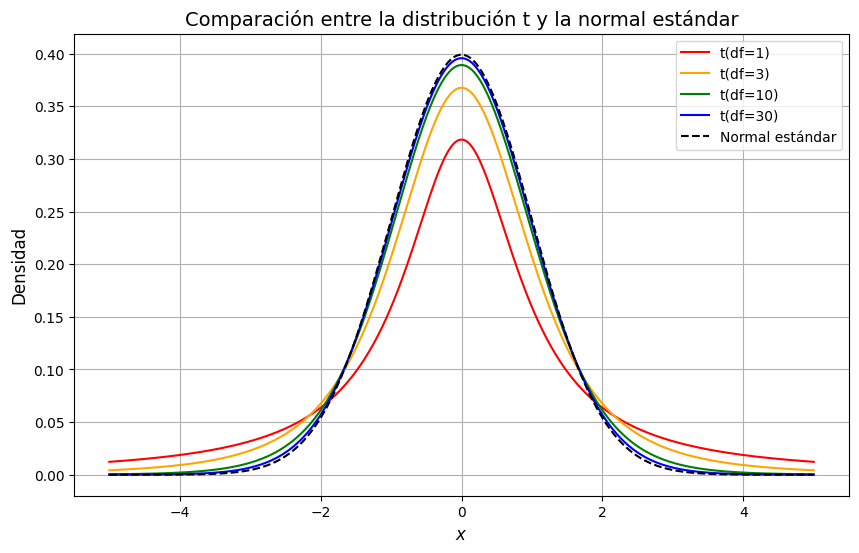

In [10]:

# Valores de x para graficar
x = np.linspace(-5, 5, 500)

# Distribuciones t con diferentes grados de libertad
dfs = [1, 3, 10, 30]
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize=(10, 6))

# Graficar curvas t
for df, color in zip(dfs, colors):
    plt.plot(x, t.pdf(x, df), label=f't(df={df})', color=color)

# Graficar la normal estándar
plt.plot(x, norm.pdf(x), 'k--', label='Normal estándar')

# Formato de la gráfica
plt.title('Comparación entre la distribución t y la normal estándar', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Estadística t: 2.000
Valor crítico t (95%): ±2.131


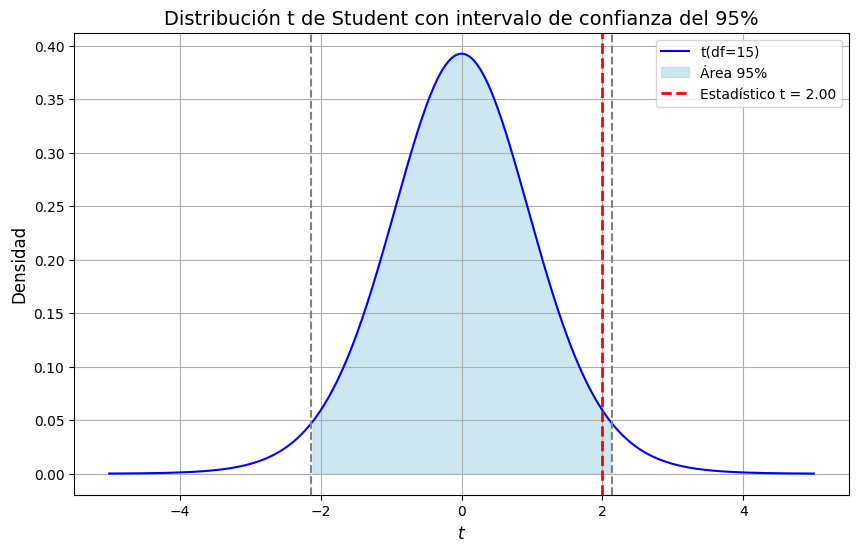

In [11]:

# Parámetros del ejemplo
n = 16                     # tamaño de muestra
df = n - 1                 # grados de libertad
media_muestral = 17.5
media_hipotetica = 16
desv_est_muestral = 3

# Estadística t
t_stat = (media_muestral - media_hipotetica) / (desv_est_muestral / np.sqrt(n))
print(f'Estadística t: {t_stat:.3f}')

# Intervalo de confianza del 95%
alpha = 0.05
t_critico = t.ppf(1 - alpha/2, df)
print(f'Valor crítico t (95%): ±{t_critico:.3f}')

# Gráfica
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label=f't(df={df})', color='blue')

# Rellenar área bajo la curva para el IC
plt.fill_between(x, y, where=(x >= -t_critico) & (x <= t_critico), color='lightblue', alpha=0.6, label='Área 95%')

# Línea para el valor de la estadística t calculada
plt.axvline(t_stat, color='red', linestyle='--', lw=2, label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(-t_critico, color='gray', linestyle='--')
plt.axvline(t_critico, color='gray', linestyle='--')

# Detalles del gráfico
plt.title('Distribución t de Student con intervalo de confianza del 95%', fontsize=14)
plt.xlabel('$t$', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### 2.1.2 Distribución F de Fisher

Es una distribución continua utilizada en estadística, principalmente para comparar varianzas y en el contexto de análisis de varianza (ANOVA) y regresión.

Sea $X \sim \chi^2_{d_1}, \quad Y \sim \chi^2_{d_2}$ dos variables aleatorias independientes con d1d y d2d grados de libertad, respectivamente. Entonces, la variable:
$$ F = \frac{(Y / d_1)}{(X / d_2)}$$
sigue una distribución F con d1 y d2d grados de libertad:
$$ F \sim F(d_1, d_2)$$
________________________________________
Propiedades:
* Solo toma valores positivos: $  F \geq 0$.
* Su forma depende de los grados de libertad $d_1$  y $d_2$.
* Es asimétrica, especialmente con pocos grados de libertad.
* Si $d_1$  y $d_2$ son grandes, la distribución F se aproxima a la normal.
________________________________________
Usos principales:

1.	Prueba de igualdad de varianzas:
Se usa para verificar si dos poblaciones tienen varianzas iguales.
2.	ANOVA (Análisis de varianza):
Compara las medias de varios grupos al analizar la relación entre la variabilidad dentro y entre los grupos.
3.	Regresión lineal múltiple:
La F se usa para probar la significancia global del modelo.
________________________________________
Ejemplo de hipótesis F (en ANOVA):
* Hipótesis nula $H_0$: Las medias de todos los grupos son iguales.
* Hipótesis alternativa $H_a$: Al menos una media es diferente.

Se calcula un estadístico F y se compara con un valor crítico o se obtiene el p-valor.



### Ejemplo

In [12]:
# Rango de valores para las gráficas
x_f = np.linspace(0, 5, 500)
x_chi = np.linspace(0, 20, 500)

# --- Distribución F de Fisher ---
df1, df2 = 5, 10
f_dist = f.pdf(x_f, df1, df2)

plt.figure(figsize=(12, 5))

# Gráfica de F
plt.subplot(1, 2, 1)
plt.plot(x_f, f_dist, label=f'F({df1}, {df2})', color='purple')
plt.title('Distribución F de Fisher', fontsize=14)
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

# --- Distribuciones Ji-cuadrada ---
df_chi_list = [1, 3, 6, 10]

plt.subplot(1, 2, 2)
for df in df_chi_list:
    plt.plot(x_chi, chi2.pdf(x_chi, df), label=f'χ²({df})')
plt.title('Distribuciones Ji-cuadrada', fontsize=14)
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: 'Mul' object has no attribute 'pdf'

### 2.1.3 Distribución Ji-cuadrada (Chi-cuadrada)

Si:

- $X \sim \mathcal{N}(0,1)$  
- Entonces: $X^2 \sim \chi^2(1)$

Y si:

$$
\sum_{i=1}^{n} X_i^2 \sim \chi^2(n)
$$

> 📌 La distribución $\chi^2(k)$ surge como la suma de los cuadrados de $k$ variables normales estándar independientes.


### Ejemplo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# Parámetro: grados de libertad
df = 4

# Generamos datos chi-cuadrado
n = 10000
datos_chi2 = np.random.chisquare(df=df, size=n)

# Visualizamos la distribución
plt.figure(figsize=(10, 6))
sns.histplot(datos_chi2, bins=50, kde=True, stat='density', color='mediumseagreen', label='Simulación')

# Curva teórica
x = np.linspace(0, np.max(datos_chi2), 1000)
plt.plot(x, chi2.pdf(x, df), 'r--', label='Densidad teórica (χ²)')

# Detalles del gráfico
plt.title(f'Distribución Chi-Cuadrado con {df} grados de libertad', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


## 3.1 Intervalos de confianza

### 3.1.1 Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

##### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

###### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde

- $\sigma$ = desviación estándar  
- $\frac{\sigma}{\sqrt{n}}$ = error estándar de la media  
- $z_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Observación**

- A mayor $n$, menor es el error estándar, y el intervalo de confianza es más pequeño.
- Esto hace que se acerque más a la media $\mu$, es decir, que haya menor variación.

### Ejemplo

Para tratar de estimar la media de consumo por cliente en un gran restaurante, se reunieron datos de una muestra de 49 clientes durante 3 semanas.

**a)** Supongamos que la **desviación estándar de la población** es de $\$2.50$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la **media de la muestra** es de $\$22.60$, cuál es el intervalo de confianza del $95\%$ para la media de la población?

In [ ]:
# Datos
n=49
sigma = 2.50
media_muestral = 22.60 
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
#error_estandar
print(f" a) Error estándar de la media: {error_estandar:.2f}")

# b) Margen de error
z = st.norm.ppf(1-(1-confianza) / 2)
margen_error = z * error_estandar
#margen_error
print(f" b) Margen de error con 95% de confianza: {margen_error:.2f}")

# c) 
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f" c) Intervalo de confianza del 95%: ({limite_inferior:.2f},{limite_superior:.2f})")

$1-\alpha=.95$, implica que $z_{\alpha/2} = z_{0.025} = 1.96$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza

In [ ]:
# Datos
n = 100
media_muestral = 70
sigma = 10
nivel_confianza = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"Intervalo de confianza del 95% es: {intervalo}")


In [ ]:
# Puntos para graficar la curva normal
x = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 500)
y = st.norm.pdf(x, loc=media_muestral, scale=error_estandar)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribución normal', color='black')

# Sombrear el intervalo de confianza
plt.fill_between(x, y, where=(x >= intervalo[0]) & (x <= intervalo[1]), color='skyblue', alpha=0.6, label='IC 95%')

# Líneas verticales
plt.axvline(intervalo[0], color='blue', linestyle='--', label=f'IC inferior = {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'IC superior = {intervalo[1]:.2f}')
plt.axvline(media_muestral, color='red', linestyle='-', label=f'Media muestral = {media_muestral}')

plt.title('Intervalo de confianza del 95% para la media ($\\sigma$ conocida)', fontsize=14)
plt.xlabel('Valor de la variable')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### 3.1.2 Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$: 
**Estadístico t**

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

**El intervalo del** $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

### Ejemplos

Supongamos que tenemos los siguientes datos
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [ ]:
# Datos del ejemplo 
data = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
confidence = 0.95
gl = len(data) - 1 # grados de liber

# Media y error estandar
mean = np.mean(data)
error_est = st.sem(data)

# Intervalo de confianza usando t de Student
intervalo = st.t.interval(confidence, gl, loc = mean, scale = error_est)

print(f"Media muestral: {mean:.2f}")
print(f"Error estandar: {error_est:.2f}")
print(f"El intervalo de confianza del 95% es: {intervalo}")


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [ ]:
# datos
n = 100
media_muestral = 1750
desv_estandar_muestral = 315.8
confianza = 0.90

# a) Usar la normal ya que el tamaño de la muestra es grande
error_est = desv_estandar_muestral / np.sqrt(n)
error_est
intervalo_media = st.norm.interval(confidence=confianza, loc = media_muestral, scale = error_est)
print(f"El intervalo de confianza del 90% es: {intervalo_media}")

# b) Intervalo de confianza para la varianza (usar chi-cuadrada)
alpha = 1-confianza
gl = n-1
s2 = desv_estandar_muestral**2

#Cuantiles de la chi-cuadrada
chi2_inf = st.chi2.ppf(alpha / 2,df=gl)
chi2_sup = st.chi2.ppf(1- alpha / 2,df=gl)

# Intervalo de confianza
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza}")

#Otra forma
chi2_low, chi2_high = chi2.interval(confianza,df=gl)
intervalo_varianza1 = ((gl * s2) / chi2_high, (gl * s2) / chi2_low )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza1}")


**Ejemplo**  El artículo *"Evaluation of a Ventilation Strategy to Prevent Barotrauma in Patients at High Risk for Acute Respiratory Distress Syndrome"* reportó sobre un experimento con 120 pacientes con anestesistas en cuidados intensivos (UCI), los cuales fueron divididos al azar en dos grupos, donde cada uno esta compuesto por 60 pacientes. 

- Grupo A: promedio de permanencia = 14.1 horas
- Grupo B: promedio de permanencia = 17.5 horas
- Desviación estándar en ambos = 5.1 hrs

Encontrar un intervalo del $95\%$ de confianza para la diferecia de medias poblacionales: $(\mu_A - \mu_B)$  

In [ ]:
#Datos 
n1 = 60
n2 = 60
media1 = 14.1
media2 = 17.5
sigma = 5.1
confianza = 0.95
alpha = 1-confianza
#gl = n1 + n2 -2

#valor critico
z = st.norm.ppf(1 - alpha / 2)

#Error estandar
error_est = sigma * np.sqrt(1/n1 + 1/n2)
dif_medias = media1 - media2
margen_error = z *error_est

lim_inf = dif_medias - margen_error
lim_sup = dif_medias + margen_error
print(f"Diferencia de las medias: {dif_medias:.2f}")
print(f"Intervalo de confianza del 95%: ({lim_inf:.2f},{lim_sup:.2f})")

### Ejercicios

In [ ]:
def printmd(string):
    display(Markdown(string))

**Ejercicio** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  1

In [ ]:
# Datos
n = 225
x = 100
p_hat = x / n
nivel_confianza = 0.95

error_estandar = np.sqrt(p_hat * (1 - p_hat) / n)

z = st.norm.ppf(1 - (1 - nivel_confianza) / 2)

intervalo_prop = st.norm.interval(confidence=nivel_confianza, loc=p_hat, scale=error_estandar)

printmd("**Intervalo de confianza del 95% para la proporción:**")
printmd(rf"$\text{{Intervalo}} = ({intervalo_prop[0]:.3f},\ {intervalo_prop[1]:.3f})$")

**Ejercicio** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [ ]:
datos = np.array([1.2, 2.1, 2.3, 1.9, 3.0, 1.5, 2.8, 2.4, 1.7, 2.6, 2.0, 1.8, 3.1, 2.2, 2.5])
n = len(datos)
confianza = 0.90
media = np.mean(datos)
varianza = np.var(datos, ddof=1)
desv_std = np.std(datos, ddof=1)

# a) IC para mu con sigma conocida (=2)
sigma = 2
error_estandar_a = sigma / np.sqrt(n)
z = st.norm.ppf(1 - (1 - confianza) / 2)
lim_a = st.norm.interval(confianza, loc=media, scale=error_estandar_a)

# b) IC para mu con sigma desconocida
error_estandar_b = desv_std / np.sqrt(n)
t = st.t.ppf(1 - (1 - confianza) / 2, df=n-1)
lim_b = (media - t * error_estandar_b, media + t * error_estandar_b)

# c) IC para varianza (sigma^2)
chi2_inf = st.chi2.ppf((1 - confianza) / 2, df=n-1)
chi2_sup = st.chi2.ppf(1 - (1 - confianza) / 2, df=n-1)
lim_c = ((n - 1) * varianza / chi2_sup, (n - 1) * varianza / chi2_inf)

printmd("""##### Datos muestrales:""")
printmd(rf"""$\bar{{x}} = {media:.3f}$, $s^2 = {varianza:.3f}$, $s = {desv_std:.3f}$""")

printmd("""##### a) Intervalo de confianza del 90% para $\\mu$, con $\\sigma = 2$ conocida:""")
printmd(rf"""$\left({lim_a[0]:.3f},\ {lim_a[1]:.3f}\right)$""")

printmd("""##### b) Intervalo de confianza del 90% para $\\mu$, con $\\sigma$ desconocida:""")
printmd(rf"""$\left({lim_b[0]:.3f},\ {lim_b[1]:.3f}\right)$""")

printmd("""##### c) Intervalo de confianza del 90% para $\\sigma^2$:""")
printmd(rf"""$\left({lim_c[0]:.3f},\ {lim_c[1]:.3f}\right)$""")

**Ejercicio** Los ingresos semanales promedio de las personas que trabajan en varias industrias aparecieron en el *The New York Times 1988 Almanac*.  
Esos ingresos para quienes trabajan en los servicios fueron de $\$369$. Suponga que este resultado se basó en una muestra de 250 personas dedicadas a los servicios y que la desviación estándar de la muestra fue de $\$50$. Calcula el intervalo de confianza del 95% para la media de la población de ingresos semanales de personas que trabajan en los servicios.

In [ ]:
n = 250
media = 369
s = 50
confianza = 0.95

error_estandar = s / np.sqrt(n)

t = st.t.ppf(1 - (1 - confianza) / 2, df=n-1)

limite_inferior = media - t * error_estandar
limite_superior = media + t * error_estandar

printmd("##### Intervalo de confianza del 95% para la media de ingresos semanales:")
printmd(rf"$\bar{{x}} = {media}$, $s = {s}$, $n = {n}$")
printmd(rf"$\text{{Intervalo}} = \left({limite_inferior:.3f},\ {limite_superior:.3f}\right)$")

**Ejercicio** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.

In [ ]:
media = 12658
n = 480
sigma = 2000
niveles_confianza = [0.90, 0.95, 0.99]
intervalos = {}

for nivel in niveles_confianza:
    z = st.norm.ppf(1 - (1 - nivel) / 2)
    error_estandar = sigma / np.sqrt(n)
    lim_inf = media - z * error_estandar
    lim_sup = media + z * error_estandar
    ancho = lim_sup - lim_inf
    intervalos[nivel] = (lim_inf, lim_sup, ancho)

# Resultados
printmd("##### a) Intervalo de confianza del 90% para la media de la deuda:")
printmd(rf"$({intervalos[0.90][0]:.2f},\ {intervalos[0.90][1]:.2f})$ (ancho = {intervalos[0.90][2]:.2f})")

printmd("##### b) Intervalo de confianza del 95% para la media de la deuda:")
printmd(rf"$({intervalos[0.95][0]:.2f},\ {intervalos[0.95][1]:.2f})$ (ancho = {intervalos[0.95][2]:.2f})")

printmd("###### c) Intervalo de confianza del 99% para la media de la deuda:")
printmd(rf"$({intervalos[0.99][0]:.2f},\ {intervalos[0.99][1]:.2f})$ (ancho = {intervalos[0.99][2]:.2f})")

# d) Análisis del ancho del intervalo
printmd("##### d) ¿Qué sucede con el ancho del intervalo al aumentar el nivel de confianza?")
printmd("A medida que el nivel de confianza aumenta, el ancho del intervalo también se incrementa:")
printmd("- 90% → ancho ≈ {:.2f}".format(intervalos[0.90][2]))
printmd("- 95% → ancho ≈ {:.2f}".format(intervalos[0.95][2]))
printmd("- 99% → ancho ≈ {:.2f}".format(intervalos[0.99][2]))
printmd("Esto es razonable, ya que para estar más seguros de que el verdadero valor poblacional esté dentro del intervalo, se necesita cubrir un rango más amplio de posibles valores.")

**Ejercicio** La encuesta anual de calidad de automóviles, efectuada por *J. D. Power & Associates*, determinó que la cantidad promedio de defectos, en todas las marcas, por cada vehículo nuevo es **1.07**  (*The Wall Street Journal*, 27 de enero de 1994). Suponga que se toma una muestra de **30 automóviles nuevos** de determinada marca y se obtienen las siguientes cantidades de defectos por vehículo:
$$ 0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0 $$

**a)** ¿Cuál es el promedio muestral de la cantidad de defectos por vehículo?

**b)** ¿Cuál es la desviación estándar de la muestra?

**c)** Determine un intervalo de confianza del 95% para la **media de defectos** por vehículo de esta marca.

**d)** Un analista sugirió que se debería **revisar una muestra mayor** antes de comparar con el promedio general de J.D. Power (1.07). ¿Respalda usted esta idea? ¿Por qué?

In [ ]:
datos = np.array([0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0])
n = len(datos)
confianza = 0.95
media = np.mean(datos)
s = np.std(datos, ddof=1)

error_estandar = s / np.sqrt(n)
t = st.t.ppf(1 - (1 - confianza) / 2, df=n-1)
lim_inf = media - t * error_estandar
lim_sup = media + t * error_estandar

printmd("##### a) Promedio muestral de defectos:")
printmd(rf"$\bar{{x}} = {media:.3f}$")

printmd("##### b) Desviación estándar muestral:")
printmd(rf"$s = {s:.3f}$")

printmd("##### c) Intervalo de confianza del 95% para la media:")
printmd(rf"$({lim_inf:.3f},\ {lim_sup:.3f})$")

printmd("##### d) ¿Es razonable tomar una muestra mayor antes de comparar con el promedio general (1.07)?")
printmd(
    "Sí, es razonable. Aunque el promedio muestral es $1.27$, el intervalo de confianza del $95\\%$ es "
    f"({lim_inf:.2f}, {lim_sup:.2f}), lo cual incluye el promedio general de 1.07. "
    "Esto significa que no hay evidencia estadística suficiente para afirmar que esta marca difiere del promedio general. "
    "Una muestra más grande reduciría la variabilidad y haría más precisa la estimación.")


**Ejercicio** Un artículo que apareció en el ejemplar de noviembre de 1983 de *Consumer Reports* comparó varios tipos de baterías.  
Se informó que los siguientes datos provienen de una muestra de 20 baterías (en horas de duración):
$$ [2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100, 2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710] $$
Determine la media muestral, la desviación estándar muestral, y el intervalo de confianza del **90%** para la media poblacional.

In [ ]:
baterias = np.array([2200, 2290, 2390, 2410, 2480, 2500, 2580, 2700, 2030, 2100,
                     2190, 1600, 1740, 1900, 1930, 2000, 1510, 1470, 1770, 1710])
n = len(baterias)
confianza = 0.90
media = np.mean(baterias)
s = np.std(baterias, ddof=1)

error_estandar = s / np.sqrt(n)
t = st.t.ppf(1 - (1 - confianza) / 2, df=n-1)
lim_inf = media - t * error_estandar
lim_sup = media + t * error_estandar

printmd("##### Media y desviación estándar muestral:")
printmd(rf"$\bar{{x}} = {media:.2f}$")
printmd(rf"$s = {s:.2f}$")

printmd("###### Intervalo de confianza del 90% para la media poblacional:")
printmd(rf"$({lim_inf:.2f},\ {lim_sup:.2f})$")

**Ejercicio** El toxafen es un insecticida que ha sido identificado como contaminante en el ecosistema de los Grandes Lagos.  
Para investigar el efecto de la exposición al toxafen en animales, a grupos de ratas se les administró toxafen en su dieta.

El artículo *"Reproduction Study of Toxaphene in Rat"* reporta **aumentos de peso (en gramos)** de ratas a las que se les administró una **dosis baja (4 ppm)** y de ratas de **control** cuya dieta no incluía el insecticida.

- En el grupo **control**, una muestra de **23 ratas hembras** tuvo una media de **$\bar{X_2} = 210$ g** y una desviación estándar de **32 g**.
- En el grupo con **dosis baja**, una muestra de **20 ratas hembras** tuvo una media de **$\bar{X_1} = 190$ g** y una desviación estándar de **54 g**.

Encuentra un **intervalo de confianza del 90% para la diferencia de medias** poblacionales:  $\mu_1 - \mu_2$, donde:

- $\mu_1$ es la media poblacional de incremento de peso en el grupo con **dosis baja**.
- $\mu_2$ es la media poblacional de incremento de peso en el grupo **control**.

¿Sugiere este intervalo que el toxafen **reduce** el incremento de peso en ratas?  
¿Incluye el intervalo el valor 0? ¿Por qué es importante?

In [ ]:
##### Grupo con dosis baja 
n1, x1_bar, s1 = 20, 190, 54
##### Grupo control 
n2, x2_bar, s2 = 23, 210, 32

confianza = 0.90

diferencia = x1_bar - x2_bar

se = np.sqrt((s1**2 / n1) + (s2**2 / n2))

df = ((s1**2 / n1 + s2**2 / n2) ** 2) / (
    ((s1**2 / n1) ** 2) / (n1 - 1) + ((s2**2 / n2) ** 2) / (n2 - 1)
)

t = st.t.ppf(1 - (1 - confianza) / 2, df=df)

lim_inf = diferencia - t * se
lim_sup = diferencia + t * se

printmd("##### Intervalo de confianza del 90% para $\\mu_1 - \\mu_2$:")
printmd(rf"$\text{{IC}} = ({lim_inf:.2f},\ {lim_sup:.2f})$")

##### Interpretación 
printmd("##### ¿El intervalo sugiere que el toxafen reduce el incremento de peso?")
printmd("El intervalo incluye el **0**, lo que indica que no hay evidencia suficiente para afirmar que el toxafen "
        "reduce el incremento de peso en ratas. Es posible que la diferencia observada se deba al azar.")

## 4.1 Pruebas de hipotesis

Una hipótesis estadística,o simplemente hipótesis, es una afirmación o conjetura acerca de la distribución de una o más variables aleatorias.

Establecer con precisió las hipótesis a contrastar depende fuertemente del estudio que se esté llevando a cabo, de la pregunta que se desee contestar, y de la información adicional que se tenga acerca del problema particular en estudio. Una hipótesis es simple si especifica por completo la distribución de probabilidad en cuesti´on, en caso contrario, la hipótesis se llama compuesta

Ilustraremos las ideas básicas de una prueba de hipótesis mediante un ejem plo sencillo e interesante. Más adelante formalizaremos los conceptos para el caso de pruebas concernientes a los parámetros de las distribuciones de probabilidad.

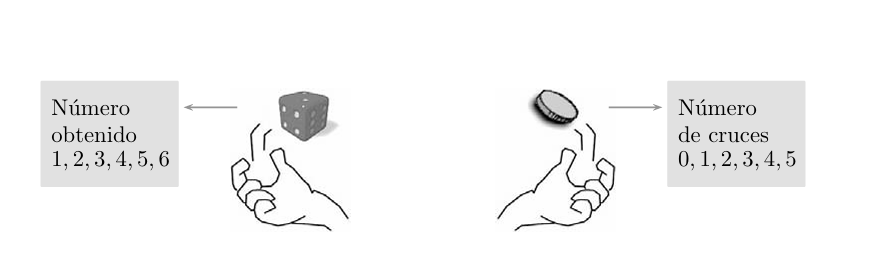

Consideremos una situación en la que se efectúa sólo uno de los siguientes dos experimentos aleatorios: se lanza un dado equilibrado y se registra el número obtenido, o bien se lanza una moneda cinco veces y se registra el número de cruces totales que se obtienen. Supondremos que los lados de cada moneda se denominan cara y cruz. El problema radica en que únicamente conocemos el resultado reportado x y no conocemos el experimento aleatorio efectuado. Deseamos determinar cuál de los dos experimentos se realizó con base en el número x observado. Tenemos entonces una situación de dos hipótesis: H0 : “Se lanzó el dado” vs H1 : “Se lanzó la moneda”. Como única información sobre este experimento tenemos un número x den tro del conjunto t0,1,2,3,4,5,6, y con base en él debemos decidir si se llevó a cabo un experimento o el otro. La pregunta que nos planteamos es ¿qué decisión tomar para cada valor de x? Observemos que si el número reportado es 0, entonces con seguridad se realizó el experimento de la moneda. En cambio, si se reporta el número 6, entonces con seguridad el dado fue lanzado. Una forma de responder esta pregunta es usando máxima verosimilitud. 

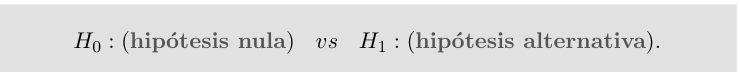


 Llevar a cabo una prueba de hipótesis significa aplicar una regla para decidir si se acepta la hipótesis nula o se rechaza en favor de la hipótesis alternativa.
La información para obtener una regla de decisión que nos lleve a rechazar o no rechazar una hipótesis estadística provendrá de una muestra aleatoria de la distribución en estudio. 
Por otro lado, al aceptar una hipótesis no se afirma que ésta sea absolutamente cierta, sino simplemente que es consistente con los datos de la muestra aleatoria y la regla de decisión adoptada. Si la
 información de la muestra o la regla de decisión cambia, muy posiblemente también cambie la decisión de rechazar o no rechazar

### Ejemplos

Supongamos que tenemos dos grupos de estudiantes que han tomado un curso y queremos saber si hay una diferencia significativa en sus puntuaciones finales en el examen. Queremos realizar una prueba de hipótesis para comparar si las medias de ambos grupos son diferentes.

* Hipótesis nula 𝐻0 : Las medias de los dos grupos son iguales.
* Hipótesis alternativa 𝐻𝑎: Las medias de los dos grupos no son iguales

In [ ]:
# Datos de ejemplo (notas de dos grupos de estudiantes)
grupo_1 = [85, 90, 88, 92, 94, 89, 91, 93, 86, 88]
grupo_2 = [80, 78, 82, 85, 84, 80, 79, 83, 81, 77]

# 1. Calcular las medias y desviaciones estándar de ambos grupos
media_1 = np.mean(grupo_1)
media_2 = np.mean(grupo_2)
desviacion_1 = np.std(grupo_1, ddof=1)  # Usando ddof=1 para varianza muestral
desviacion_2 = np.std(grupo_2, ddof=1)

# 2. Número de observaciones en cada grupo
n1 = len(grupo_1)
n2 = len(grupo_2)

# 3. Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(grupo_1, grupo_2)

# 4. Imprimir resultados
print(f"Media Grupo 1: {media_1}")
print(f"Media Grupo 2: {media_2}")
print(f"Desviación estándar Grupo 1: {desviacion_1}")
print(f"Desviación estándar Grupo 2: {desviacion_2}")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# 5. Decisión sobre la hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las medias.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las medias son diferentes.")


** Ejemplo **

Supongamos que estamos evaluando si el tiempo promedio que los empleados pasan en su puesto de trabajo es diferente a una cantidad esperada (por ejemplo, 8 horas).
* Hipótesis nula 𝐻0: El tiempo promedio que los empleados pasan en el trabajo es igual a 8 horas.
* Hipótesis alternativa 𝐻𝑎: El tiempo promedio que los empleados pasan en el trabajo no es igual a 8 horas.

In [ ]:
import numpy as np
import scipy.stats as stats

# Datos de ejemplo (tiempo en horas que los empleados pasan en el trabajo)
empleados_tiempo = [8.1, 7.9, 8.3, 7.8, 8.2, 7.7, 8.0, 7.9, 8.1, 8.3]

# 1. Calcular la media y desviación estándar de la muestra
media_muestra = np.mean(empleados_tiempo)
desviacion_muestra = np.std(empleados_tiempo, ddof=1)

# 2. Número de observaciones
n = len(empleados_tiempo)

# 3. Tiempo esperado (hipótesis nula)
tiempo_esperado = 8

# 4. Realizar la prueba t de una sola muestra
t_stat, p_value = stats.ttest_1samp(empleados_tiempo, tiempo_esperado)

# 5. Imprimir resultados
print(f"Media de la muestra: {media_muestra}")
print(f"Desviación estándar de la muestra: {desviacion_muestra}")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# 6. Decisión sobre la hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: El tiempo promedio es diferente de 8 horas.")
else:
    print("No podemos rechazar la hipótesis nula: El tiempo promedio es igual a 8 horas.")
